<a href="https://colab.research.google.com/github/adabiratsi/Deep-Learning/blob/main/ada_x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Get the data from Kaggle**

In [ ]:
import os
os.environ['KAGGLE_USERNAME']= "adabiratsi"
os.environ['KAGGLE_KEY']= "f1696164aeae724987e8c7c0da710543"

In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

 98% 765M/778M [00:05<00:00, 128MB/s]
100% 778M/778M [00:05<00:00, 158MB/s]


**Unzip the** **data**

In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

**Have a look at the data**

In [ ]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/'))

2

In [ ]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [ ]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

# New Section

 **An imbalance is observed in the data.**

In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
img= cv2.imread('/content/COVID-19_Radiography_Dataset/Normal/images/Normal-10006.png')

In [ ]:
df= pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

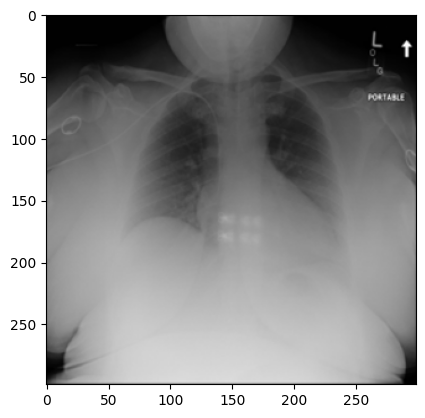

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(299, 299, 3)

In [ ]:
df.head

<bound method NDFrame.head of        FILE NAME FORMAT     SIZE  \
0        COVID-1    PNG  256*256   
1        COVID-2    PNG  256*256   
2        COVID-3    PNG  256*256   
3        COVID-4    PNG  256*256   
4        COVID-5    PNG  256*256   
...          ...    ...      ...   
3611  COVID-3612    PNG  256*256   
3612  COVID-3613    PNG  256*256   
3613  COVID-3614    PNG  256*256   
3614  COVID-3615    PNG  256*256   
3615  COVID-3616    PNG  256*256   

                                                    URL  
0     https://sirm.org/category/senza-categoria/covi...  
1     https://sirm.org/category/senza-categoria/covi...  
2     https://sirm.org/category/senza-categoria/covi...  
3     https://sirm.org/category/senza-categoria/covi...  
4     https://sirm.org/category/senza-categoria/covi...  
...                                                 ...  
3611  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3612  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3613  https://b

**Create a function to load the images**

In [ ]:
urls= os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [ ]:
path= "COVID-19_Radiography_Dataset/COVID/images" + urls[0]

In [ ]:
def loadImages(path, urls, target):
  images= []
  labels= []
  for i in range(len(urls)):
    img_path= path + "/" + urls[i]
    img= cv2.imread(img_path)
    img= img/ 255.0
    print(img_path)
    img=cv2.resize(img,(100,100))
    images.append(img)
    labels.append(target)
  images= np.asarray(images)
  return images, labels

check

Target= 1 -> Covid
Target=0 -> Normal

In [ ]:
covid_path= "COVID-19_Radiography_Dataset/COVID/images"
covid_url= os.listdir('COVID-19_Radiography_Dataset/COVID/images')
covidImages, covidTargets= loadImages(covid_path, covid_url, 1)

In [ ]:
normal_path= "COVID-19_Radiography_Dataset/Normal/images"
normal_url= os.listdir('COVID-19_Radiography_Dataset/Normal/images')
normalImages, normalTargets= loadImages(normal_path, normal_url, 0)

In [ ]:
len(covid_url), len(covidImages)

(3616, 3616)

Convert into an np.array

In [ ]:
covidImages= np.asarray(covidImages)
normalImages= np.asarray(normalImages)

In [ ]:
covidImages.shape

(3616, 100, 100, 3)

In [ ]:
normalImages.shape

(10192, 100, 100, 3)

**covid and normal are seperate. bring them together**




In [ ]:
data= np.r_[covidImages, normalImages]
data.shape

(13808, 100, 100, 3)

In [ ]:
targets= np.r_[covidTargets, normalTargets]
targets.shape

(13808,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(data, targets, test_size=0.25)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD

In [ ]:
model= Sequential ([
    Conv2D(32, 3, input_shape=(128, 128, 3), activation= 'relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation= 'relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation= 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.add(Dropout(0.2, input_shape=(100,100,3)))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 10, 10, 16)      

Compile the model

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs= 20, validation_data=(x_test, y_test))

Epoch 1/20


ValueError: ignored

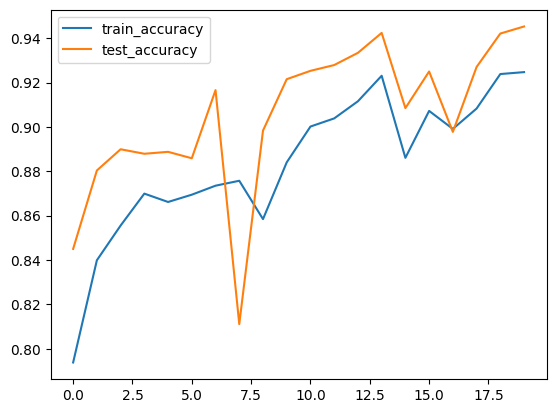

In [ ]:
plt.plot(model.history.history['accuracy'], label= 'train_accuracy')
plt.plot(model.history.history['val_accuracy'], label= 'test_accuracy')
plt.legend()
plt.show()

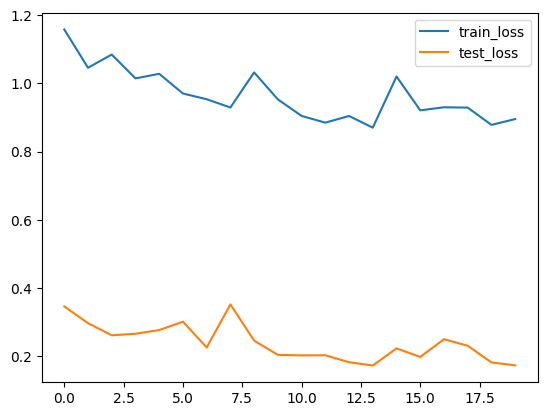

In [ ]:
plt.plot(model.history.history['loss'], label= 'train_loss')
plt.plot(model.history.history['val_loss'], label= 'test_loss')
plt.legend()
plt.show()